In [1]:
import tensorflow as tf
from pandas import read_csv
import numpy as np
from numpy import dstack
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from itertools import product

In [2]:
# load dataset
class_names = ['walking', 'upstair', 'stand', 'sit', 'none']
def load_file(filepath):
  dataframe = read_csv(filepath, header=None, delim_whitespace=False)
  null_count = dataframe.isnull().sum().sum()
  if null_count > 0:
    dataframe = dataframe.interpolate()
  return dataframe.values

filenames = ['aX_all', 'aY_all', 'aZ_all','gX_all','gY_all','gZ_all']
file = list()
df = list()
for name in filenames:
    print(name)
    file = "F:\\PC\\Nam_3\\HK2\\DO_AN_2\\preparing_data\\MATLAB\\dataset\\" + name + ".txt"
    print(file)
    data = load_file(file)
    df.append(data)
df = dstack(df)
print(df.shape)

#load labels
labels = load_file("F:\\PC\\Nam_3\\HK2\\DO_AN_2\\preparing_data\\MATLAB\\dataset\\labels.txt")
# print(labels)
print(" ")
print(labels.shape)

# train test split
x_main, x_test, y_main, y_test = tts(df, labels, test_size= 0.3, random_state = 30)
x_train, x_val, y_train, y_val = tts(x_main, y_main, test_size= 0.2, random_state = 30)
# x_test, x_test_2, y_test, y_test_2 = tts(x_testing, y_testing, test_size= 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)
# print(x_test_2.shape)
print(x_val.shape)

# categorical encoder
from keras.utils import to_categorical
 # zero-offset class values
y_train = y_train - 1
y_test = y_test- 1
# y_test_2 = y_test_2 - 1
y_val = y_val - 1
 # one hot encode y
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)
# y_test_2 = to_categorical(y_test_2)
y_val = to_categorical(y_val)


aX_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\aX_all.txt
aY_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\aY_all.txt
aZ_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\aZ_all.txt
gX_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\gX_all.txt
gY_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\gY_all.txt
gZ_all
F:\PC\Nam_3\HK2\DO_AN_2\preparing_data\MATLAB\dataset\gZ_all.txt
(1338, 200, 6)
 
(1338, 1)
(748, 200, 6)
(402, 200, 6)
(188, 200, 6)


In [12]:
def create_model(x_train, y_train, 
              kernel_size = 3,
              filters_1 = 32,
              filters_2 = 16,
              drop_out = 0.4, 
              dense = 64):
    
    n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(layers.Conv1D(filters=filters_1, kernel_size=kernel_size, activation='relu', 
                           input_shape=(n_timesteps,n_features)))
    model.add(layers.Conv1D(filters=filters_2, kernel_size=kernel_size, activation='relu')) 
    model.add(layers.Dropout(drop_out))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(dense, activation='relu'))
    model.add(layers.Dense(n_outputs, activation='softmax'))
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


    print('\n', model.summary())
    print('\n', model.input_shape)
    print('\n', model.output_shape)    
    
    return model

model = create_model(x_train,y_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 196, 32)           992       
                                                                 
 conv1d_11 (Conv1D)          (None, 194, 16)           1552      
                                                                 
 dropout_5 (Dropout)         (None, 194, 16)           0         
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 97, 16)            0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1552)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               155300    
                                                      

In [13]:
# Train the model
verbose = 1
epochs = 150
batch_size = 10
# learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='auto')

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, 
                     validation_data=(x_val,y_val)
                    #  callbacks =learning_rate_reduction
                     )

_, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=verbose)
score = accuracy * 100



Epoch 1/150
75/75 [==============================] - 1s 8ms/step - loss: 1.3810 - accuracy: 0.4452 - val_loss: 1.3868 - val_accuracy: 0.3989
Epoch 2/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3394 - accuracy: 0.4572 - val_loss: 1.3646 - val_accuracy: 0.3989
Epoch 3/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3287 - accuracy: 0.4572 - val_loss: 1.3266 - val_accuracy: 0.3989
Epoch 4/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3413 - accuracy: 0.4572 - val_loss: 1.3779 - val_accuracy: 0.3989
Epoch 5/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3345 - accuracy: 0.4572 - val_loss: 1.3767 - val_accuracy: 0.3989
Epoch 6/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3332 - accuracy: 0.4572 - val_loss: 1.3344 - val_accuracy: 0.3989
Epoch 7/150
75/75 [==============================] - 0s 6ms/step - loss: 1.3236 - accuracy: 0.4572 - val_loss: 1.3422 - val_accuracy: 0.3989
Epoch 8/150
7

KeyboardInterrupt: 

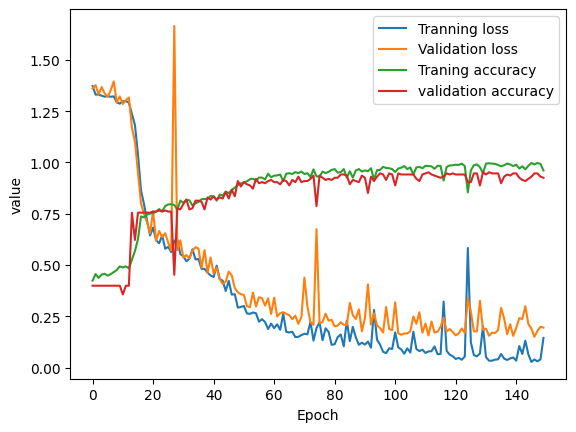

13/13 [==============================] - 0s 3ms/step


In [10]:
def show_his(history):
    plt.xlabel('Epoch')
    plt.ylabel('value')
    plt.plot(history.history['loss'], label = 'Tranning loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')
    plt.plot(history.history['accuracy'], label ='Traning accuracy')
    plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
    plt.legend()
    plt.show()
    
# prediction
show_his(history)

predictions= model.predict(x_test)

y_preds = predictions.argmax(axis=1)
y_labels = y_test.argmax(axis=1)

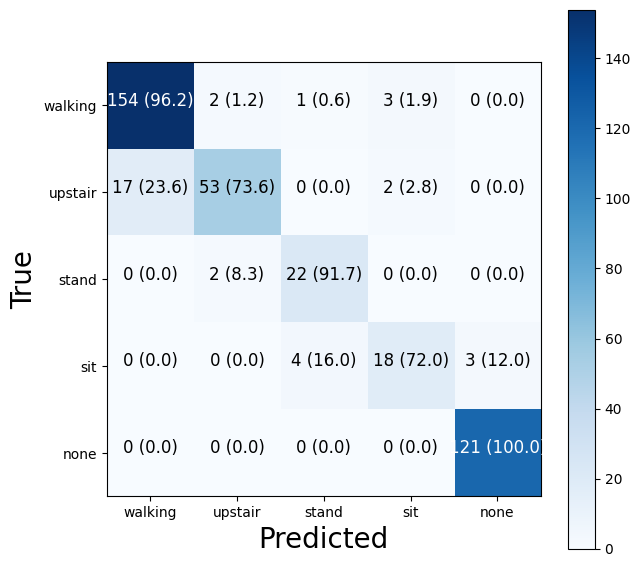

In [11]:
def plot_cm(y_test, y_preds, classes=None, figsize = (16, 16), text_size=20):
  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))

  # Normalise the confusion matrix
  cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  number_of_classes = cm.shape[0]

  # Draw the plot
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(
    #    title="Confusion Matrix \n of CNN model",
       xlabel="Predicted",
       ylabel="True",
       xticks=np.arange(number_of_classes),
       yticks=np.arange(number_of_classes),
       xticklabels=labels,
       yticklabels=labels
       )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
#   ax.title.set_size(text_size+4)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i, j]} ({cm_normalised[i, j]*100:.1f})",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=text_size*3/5)
    
plot_cm(y_labels, y_preds, figsize=(7, 7), classes=class_names)

In [23]:
# save CNN model
# x_train_reshape = tf.reshape(x_train,[x_train.shape[0],120,6,1])
# x_train_reshape = np.float32(x_train_reshape)

model1 = model
fname = "CNN_model.tflite"

def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(500):
    input_value = tf.reshape(input_value, (1, 200, 6))
    input_value = tf.dtypes.cast(input_value, tf.float32)
    yield [input_value]
############## interger only quantization ####################################
converter = tf.lite.TFLiteConverter.from_keras_model(model1)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# # Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model_quant = converter.convert()
###############################################################################
# Save the model to disk
open(fname, "wb").write(tflite_model_quant)


import os
basic_model_size = os.path.getsize(fname)
print("Model is %d bytes" % basic_model_size)

interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

tf.lite.experimental.Analyzer.analyze(model_path=fname)

INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpw0nxszps\assets


INFO:tensorflow:Assets written to: C:\Users\PC\AppData\Local\Temp\tmpw0nxszps\assets
d:\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:947: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Model is 57680 bytes
input:  <class 'numpy.int8'>
output:  <class 'numpy.int8'>
=== CNN_model.tflite ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the EXPAND_DIMS op takes
tensor #0 and tensor #1 as input and produces tensor #14 as output.

Subgraph#0 main(T#0) -> [T#25]
  Op#0 EXPAND_DIMS(T#0, T#1[-3]) -> [T#14]
  Op#1 CONV_2D(T#14, T#13, T#12[-1798, -897, 0, -1861, 0, ...]) -> [T#15]
  Op#2 RESHAPE(T#15, T#2[-1, 198, 16]) -> [T#16]
  Op#3 EXPAND_DIMS(T#16, T#1[-3]) -> [T#17]
  Op#4 CONV_2D(T#17, T#11, T#10[-4153, 308, -17901, -21678, -17793, ...]) -> [T#18]
  Op#5 RESHAPE(T#18, T#3[-1, 196, 8]) -> [T#19]
  Op#6 EXPAND_DIMS(T#19, T#4[2]) -> [T#20]
  Op#7 MAX_POOL_2D(T#20) -> [T#21]
  Op#8 RESHAPE(T#21, T#5[-1, 784]) -> [T#22]
  Op#9 FULLY_CONNECTED(T#22, T#9, T#8[-2081, -1494, -1987, -834, -952, ...]) -> [T#23]
  Op#10 FULLY_CONNECTED(T#23, T#7, T#6[157, -241, 152, 185, -175]) -> [T#24]
  Op